# Подключение библиотек и задание входных данных

In [23]:
import matplotlib.pyplot as plt
import scipy.fft as sp
import math
import cmath

q = 8
sw = True

N = 16
filter = 10000
A = [1,5,3,7,3,2,1]
f = [0.5,1,2,5,7,9,12]

samples = range(0,N)

k = 7
pi = math.pi

f = [i*1000 for i in f]

# Расчёт изначального сигнала и преобразование до целых чисел

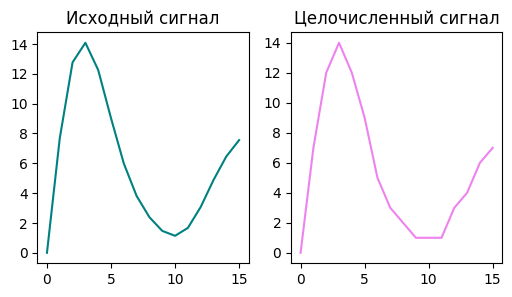

In [24]:
fd = 75000
if max(f) > 30000:
    fd = 110000
Td = 1/fd

t = []
x = []

for n in samples:
    t.append(n * Td)
    x.append(0)
    for i in range(0,k):
        x[n] += A[i] * math.sin(2*pi*f[i]*t[n])

x_old = x

x = [int(i) for i in x]

fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(6, 3))

axs[0].set_title("Исходный сигнал")
axs[0].plot(samples, x_old, 'teal')

axs[1].set_title("Целочисленный сигнал")
axs[1].plot(samples, x, 'violet')

if sw:
    plt.show()

# Натягивание совы на глобус

In [25]:
D = 2**q

def Wf(x):
    return ((math.e**(-(cmath.sqrt(-1)*2*(pi/N)*x))))

def Wf_2(x):
    d = ((math.e**(-(cmath.sqrt(-1)*2*(pi/N)*x))))*D/2
    if (x == 0):
        return 0
    return d

def Bab(A,B,W):
    print(W)
    return [A+B*W,A-B*W]

def compSum(C1,C2):
    a = C1.real
    b = C1.imag
    c = C2.real
    d = C2.imag

    return complex(a + c,b + d)

def compSub(C1,C2):
    a = C1.real
    b = C1.imag
    c = C2.real
    d = C2.imag

    return complex(a - c,b - d)

def compMul(C1,C2):
    a = C1.real
    b = C1.imag
    c = C2.real
    d = C2.imag

    return complex(a*c-b*d,a*d+b*c)

def Bab_2(A,B,W):
    print(W)
    return [compSum(A,compMul(B,W)),compSub(A,compMul(B,W))]

def BabL(AB,k):
    AB_out = [0 for i in range(0,len(AB))]
    lenH = len(AB)//2
    for i in range(0,lenH):
        AB_out[i],AB_out[i+lenH] = Bab(AB[i],AB[i+lenH],Wf(k))
    return AB_out

def Babl_2(AB,k):
    AB_out = [0 for i in range(0,len(AB))]
    lenH = len(AB)//2
    for i in range(0,lenH):
        AB_out[i],AB_out[i+lenH] = Bab_2(AB[i],AB[i+lenH],Wf_2(k))
    return AB_out

# Бабочки

Изначальная

In [26]:
gen_old = []
gen_old.append(x_old)

gen_old.append(BabL(gen_old[0],0))

gen_old.append([0 for i in gen_old[1]])

gen_old[2][:8] = BabL(gen_old[1][0:8],0)
gen_old[2][8:] = BabL(gen_old[1][8:],4)

gen_old.append([0 for i in gen_old[2]])

gen_old[3][:4] = BabL(gen_old[2][:4],0)
gen_old[3][4:8] = BabL(gen_old[2][4:8],4)
gen_old[3][8:12] = BabL(gen_old[2][8:12],2)
gen_old[3][12:] = BabL(gen_old[2][12:],6)

gen_old.append([0 for i in gen_old[3]])

gen_old[4][:2] = BabL(gen_old[3][:2],0)
gen_old[4][2:4] = BabL(gen_old[3][2:4],4)
gen_old[4][4:6] = BabL(gen_old[3][4:6],2)
gen_old[4][6:8] = BabL(gen_old[3][6:8],6)
gen_old[4][8:10] = BabL(gen_old[3][8:10],1)
gen_old[4][10:12] = BabL(gen_old[3][10:12],5)
gen_old[4][12:14] = BabL(gen_old[3][12:14],3)
gen_old[4][14:] = BabL(gen_old[3][14:],7)

ts_old = [gen_old[4][0],gen_old[4][8],gen_old[4][4],gen_old[4][12],gen_old[4][2],gen_old[4][10],gen_old[4][6],gen_old[4][14],gen_old[4][1],gen_old[4][9],gen_old[4][5],gen_old[4][13],gen_old[4][3],gen_old[4][11],gen_old[4][7],gen_old[4][15]]

(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(1+0j)
(6.123233995736766e-17-1j)
(6.123233995736766e-17-1j)
(6.123233995736766e-17-1j)
(6.123233995736766e-17-1j)
(1+0j)
(1+0j)
(6.123233995736766e-17-1j)
(6.123233995736766e-17-1j)
(0.7071067811865476-0.7071067811865475j)
(0.7071067811865476-0.7071067811865475j)
(-0.7071067811865475-0.7071067811865476j)
(-0.7071067811865475-0.7071067811865476j)
(1+0j)
(6.123233995736766e-17-1j)
(0.7071067811865476-0.7071067811865475j)
(-0.7071067811865475-0.7071067811865476j)
(0.9238795325112867-0.3826834323650898j)
(-0.3826834323650897-0.9238795325112867j)
(0.38268343236508984-0.9238795325112867j)
(-0.9238795325112867-0.3826834323650899j)


Новая

In [27]:
gen = []
gen.append(x)

gen.append(Babl_2(gen[0],0))

gen.append([0 for i in gen[1]])

gen[2][:8] = Babl_2(gen[1][0:8],0)
gen[2][8:] = Babl_2(gen[1][8:],4)

gen.append([0 for i in gen[2]])

gen[3][:4] = Babl_2(gen[2][:4],0)
gen[3][4:8] = Babl_2(gen[2][4:8],4)
gen[3][8:12] = Babl_2(gen[2][8:12],2)
gen[3][12:] = Babl_2(gen[2][12:],6)

gen.append([0 for i in gen[3]])

gen[4][:2] = Babl_2(gen[3][:2],0)
gen[4][2:4] = Babl_2(gen[3][2:4],4)
gen[4][4:6] = Babl_2(gen[3][4:6],2)
gen[4][6:8] = Babl_2(gen[3][6:8],6)
gen[4][8:10] = Babl_2(gen[3][8:10],1)
gen[4][10:12] = Babl_2(gen[3][10:12],5)
gen[4][12:14] = Babl_2(gen[3][12:14],3)
gen[4][14:] = Babl_2(gen[3][14:],7)

ts = [gen[4][0],gen[4][8],gen[4][4],gen[4][12],gen[4][2],gen[4][10],gen[4][6],gen[4][14],gen[4][1],gen[4][9],gen[4][5],gen[4][13],gen[4][3],gen[4][11],gen[4][7],gen[4][15]]

0
0
0
0
0
0
0
0
0
0
0
0
(7.83773951454306e-15-128j)
(7.83773951454306e-15-128j)
(7.83773951454306e-15-128j)
(7.83773951454306e-15-128j)
0
0
(7.83773951454306e-15-128j)
(7.83773951454306e-15-128j)
(90.50966799187809-90.50966799187808j)
(90.50966799187809-90.50966799187808j)
(-90.50966799187808-90.50966799187809j)
(-90.50966799187808-90.50966799187809j)
0
(7.83773951454306e-15-128j)
(90.50966799187809-90.50966799187808j)
(-90.50966799187808-90.50966799187809j)
(118.2565801614447-48.98347934273149j)
(-48.983479342731485-118.2565801614447j)
(48.9834793427315-118.2565801614447j)
(-118.2565801614447-48.983479342731506j)


# Графики

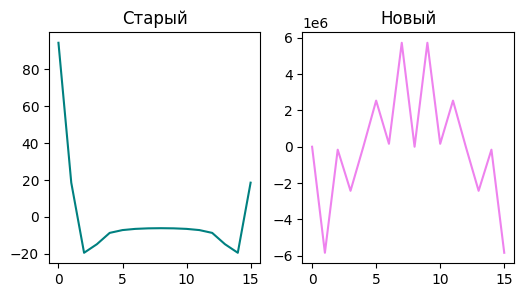

In [28]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(6, 3))

axs[0].set_title("Старый")
axs[0].plot(samples, ts_old, 'teal')

axs[1].set_title("Новый")
axs[1].plot(samples, ts, 'violet')